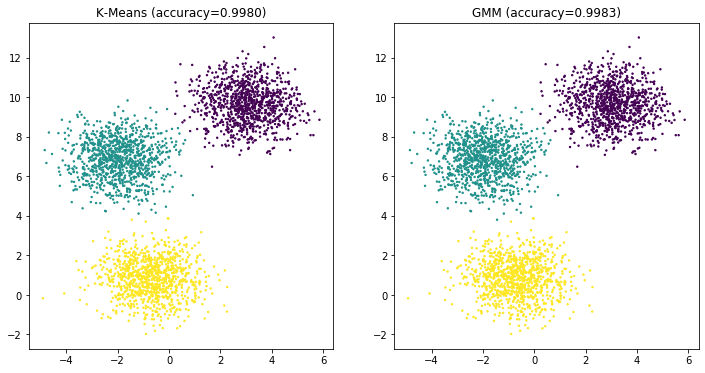

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score


n_samples = 3000
num_clusters = 3
random_state = 199
point_size = 2


def plot_scatter(X, y, title='', point_size=point_size):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=point_size)
    plt.title(title)

def map_cluster_id(y, y_pred):
    # 由于实际的y值，和聚类的y值，不完全匹配，需要匹配一下。
    y_pred_new = np.zeros(len(y_pred), dtype='i4')-1
    for i in np.unique(y_pred):
        y_cluster = y[y_pred==i]
        y_cluster_count = {j:0 for j in np.unique(y_cluster)}
        for j in y_cluster:
            y_cluster_count[j] = y_cluster_count[j] + 1
        cluster_id = -1
        cluster_count = -1
        for key, value in y_cluster_count.items():
            if value>=cluster_count:
                cluster_id = key
                cluster_count = value
        y_pred_new[y_pred==i] = cluster_id
    return y_pred_new

def compare_kmeans_gmm(X, y, num_clusters=num_clusters, random_state=random_state):
    plt.figure(figsize=(12, 6))
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=random_state)
    y_pred_kmeans = kmeans.fit_predict(X)
    y_pred_kmeans = map_cluster_id(y, y_pred_kmeans)
    accuracy_kmeans = accuracy_score(y, y_pred_kmeans)

    gmm = GaussianMixture(n_components=num_clusters, random_state=random_state)
    y_pred_gmm = gmm.fit_predict(X)
    y_pred_gmm = map_cluster_id(y, y_pred_gmm)
    accuracy_gmm = accuracy_score(y, y_pred_gmm)

    plt.subplot(1, 2, 1)
    plot_scatter(X, y_pred_kmeans, "K-Means (accuracy={:.4f})".format(accuracy_kmeans))
    plt.subplot(1, 2, 2)
    plot_scatter(X, y_pred_gmm, "GMM (accuracy={:.4f})".format(accuracy_gmm))
    
    plt.show()

    
X, y = make_blobs(n_samples=n_samples, 
                  centers=num_clusters, 
                  cluster_std=[1.0, 1.0, 1.0], 
                  random_state=random_state)

compare_kmeans_gmm(X, y) 

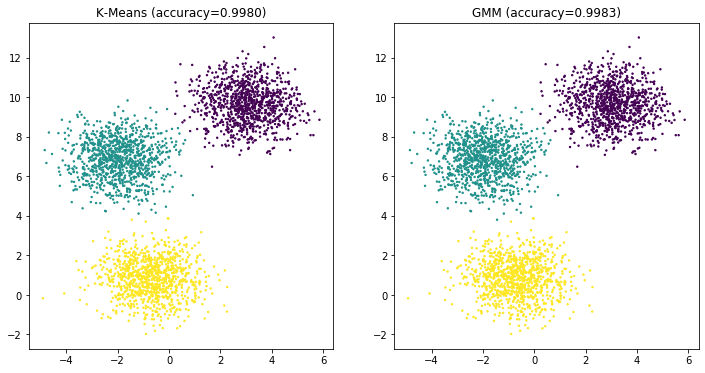

In [19]:
# 产生一个球形分布的数据集

In [5]:
transformation.T @ transformation

array([[ 0.53726478, -0.7358984 ],
       [-0.7358984 ,  1.13216434]])

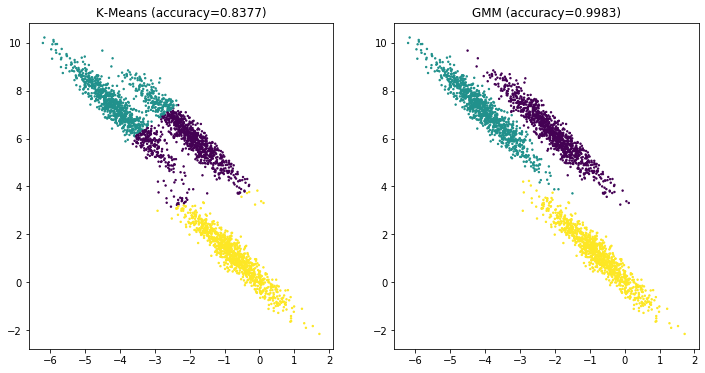

In [3]:
# 产生一个非球形分布的数据集
transformation = np.array([[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])
X_aniso = np.dot(X, transformation)

compare_kmeans_gmm(X_aniso, y)

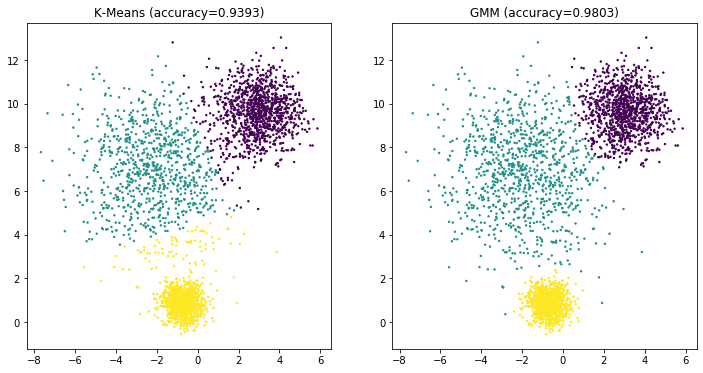

In [7]:
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                centers=3, 
                                cluster_std=[1.0, 2.0, 0.5],
                                random_state=random_state)

compare_kmeans_gmm(X_varied, y_varied) 

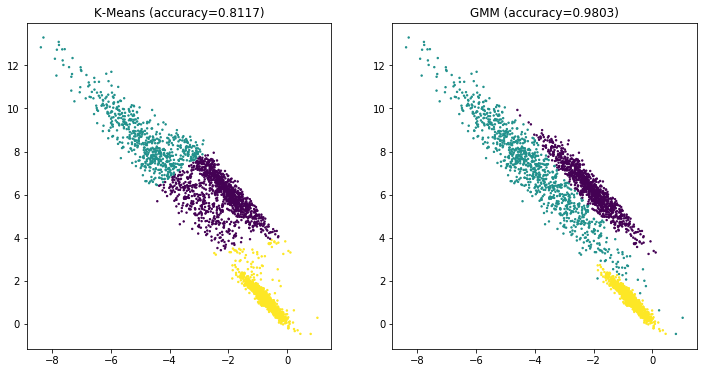

In [10]:
X_aniso_2 = np.dot(X_varied, transformation)
y_aniso_2 = y_varied

compare_kmeans_gmm(X_aniso_2, y_aniso_2) 

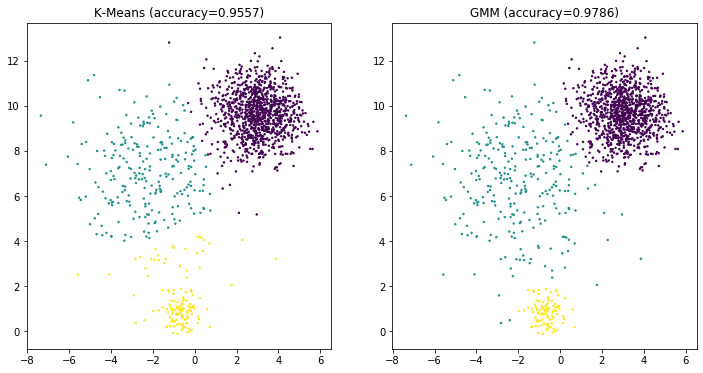

In [12]:
X_filtered = np.vstack((X_varied[y == 0][:1000], X_varied[y == 1][:300], X_varied[y == 2][:100]))
y_filtered = np.hstack((y_varied[y == 0][:1000], y_varied[y == 1][:300], y_varied[y == 2][:100]))

compare_kmeans_gmm(X_filtered, y_filtered) 

In [ ]:
num1 = round(n_samples/3)
num2 = round(num1/3)
num3 = round(num2/3)

X_filtered = np.vstack((X_aniso_2[y == 0][:num1], X_aniso_2[y == 1][:num2], X_aniso_2[y == 2][:num3]))
y_filtered = np.hstack((y_aniso_2[y == 0][:num1], y_aniso_2[y == 1][:num2], y_aniso_2[y == 2][:num3]))

compare_kmeans_gmm(X_filtered, y_filtered) 

In [ ]:
X_filtered = np.vstack((X_varied[y == 0][:1000], X_varied[y == 1][:300], X_varied[y == 2][:100]))
y_filtered = np.hstack((y[y == 0][:1000], y[y == 1][:300], y[y == 2][:100]))

compare_kmeans_gmm(X_filtered, y_filtered) 

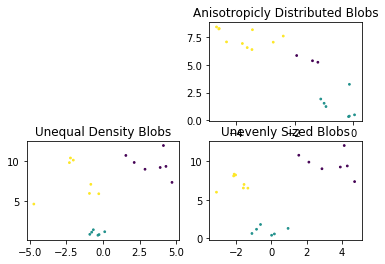

In [51]:


# 产生一个各 cluster 的样本数目不一致的数据集
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:150], X[y == 2][:50]))
gmm = GaussianMixture(n_components=3, random_state=random_state)
gmm.fit(X_filtered)
y_pred = gmm.predict(X_filtered)
plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, s=point_size)
plt.title("Unevenly Sized Blobs")
plt.show()

In [22]:
import numpy as np

def markov_chain(P, steps=100):
    pi_0 = np.random.randint(1, 100000, 3)
    pi_0 = pi_0/np.sum(pi_0)        
    print(0, pi_0)
    
    prob = pi_0
    for i in range(steps):
        prob = prob @ P
        if (i+1) % 5==0: print(i+1, prob.ravel())  
    return pi_0, prob
    
P = np.array([[0.9,   0.075, 0.025],
              [0.15,  0.8,   0.05 ],
              [0.25,  0.25,  0.5  ]], dtype=float)

pi_0, pi = markov_chain(P)

0 [0.18550117 0.50680571 0.30769312]
5 [0.54148229 0.38464511 0.0738726 ]
10 [0.60659183 0.32924366 0.06416451]
15 [0.62088198 0.31626302 0.062855  ]
20 [0.62407752 0.3133433  0.06257917]
25 [0.62479333 0.31268894 0.06251773]
30 [0.6249537  0.31254233 0.06250397]
35 [0.62498963 0.31250948 0.06250089]
40 [0.62499768 0.31250212 0.0625002 ]
45 [0.62499948 0.31250048 0.06250004]
50 [0.62499988 0.31250011 0.06250001]
55 [0.62499997 0.31250002 0.0625    ]
60 [0.62499999 0.31250001 0.0625    ]
65 [0.625  0.3125 0.0625]
70 [0.625  0.3125 0.0625]
75 [0.625  0.3125 0.0625]
80 [0.625  0.3125 0.0625]
85 [0.625  0.3125 0.0625]
90 [0.625  0.3125 0.0625]
95 [0.625  0.3125 0.0625]
100 [0.625  0.3125 0.0625]


In [49]:
pi

array([0.625 , 0.3125, 0.0625])

In [81]:
def random_row(dim=3):
    p = np.random.randint(1, 1000, 3)
    p = p/np.sum(p)
    return p

def random_matrix(dim=3):    
    p = [random_row(dim) for i in range(dim)]
    return np.array(p)

print(pi)
Q = random_matrix(3)
ALPHA = (pi.reshape((3,1)) * Q).T
P = Q*ALPHA
P = P/np.sum(P, axis=1)
print(P)
print(pi @ P)

print('-'*50)
markov_chain(P)

print('-'*50)

prob = P
for i in range(100):
    prob = prob @ P
    if (i+1) % 20==0: print(i+1, '\n' , prob)

[0.625  0.3125 0.0625]
[[0.0893296  0.408497   0.0202189 ]
 [1.77017805 0.10261042 0.13767783]
 [0.25581374 0.40197791 0.10942183]]
[0.625  0.3125 0.0625]
--------------------------------------------------
0 [0.49113084 0.16513155 0.34373761]
5 [0.53258222 0.31432991 0.05547251]
10 [0.59402944 0.28402447 0.05880432]
15 [0.57741347 0.29221946 0.05790322]
20 [0.58190664 0.29000343 0.05814689]
25 [0.58069163 0.29060267 0.058081  ]
30 [0.58102018 0.29044063 0.05809882]
35 [0.58093133 0.29048445 0.058094  ]
40 [0.58095536 0.2904726  0.0580953 ]
45 [0.58094886 0.2904758  0.05809495]
50 [0.58095062 0.29047494 0.05809504]
55 [0.58095014 0.29047517 0.05809502]
60 [0.58095027 0.29047511 0.05809503]
65 [0.58095024 0.29047513 0.05809502]
70 [0.58095025 0.29047512 0.05809502]
75 [0.58095025 0.29047512 0.05809502]
80 [0.58095025 0.29047512 0.05809502]
85 [0.58095025 0.29047512 0.05809502]
90 [0.58095025 0.29047512 0.05809502]
95 [0.58095025 0.29047512 0.05809502]
100 [0.58095025 0.29047512 0.0580950

In [73]:
0.1334707*0.02488871 

0.003321913545797

In [25]:
prob = P
for i in range(100):
    prob = prob @ P
    if (i+1) % 20==0: print(i+1, '\n' , prob)

20 
 [[0.30435656 0.52404962 0.17159382]
 [0.30435656 0.52404962 0.17159382]
 [0.30435656 0.52404962 0.17159382]]
40 
 [[0.30435656 0.52404962 0.17159382]
 [0.30435656 0.52404962 0.17159382]
 [0.30435656 0.52404962 0.17159382]]
60 
 [[0.30435656 0.52404962 0.17159382]
 [0.30435656 0.52404962 0.17159382]
 [0.30435656 0.52404962 0.17159382]]
80 
 [[0.30435656 0.52404962 0.17159382]
 [0.30435656 0.52404962 0.17159382]
 [0.30435656 0.52404962 0.17159382]]
100 
 [[0.30435656 0.52404962 0.17159382]
 [0.30435656 0.52404962 0.17159382]
 [0.30435656 0.52404962 0.17159382]]


In [85]:
print(np.__version__)

1.18.5


In [40]:

print(np.sum(prob), prob)

1.0 [0.15727871 0.5442575  0.29846379]
